### Treść zadania

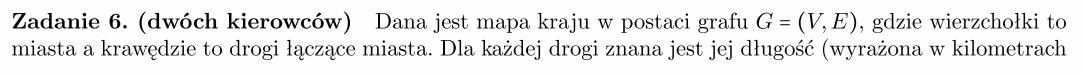
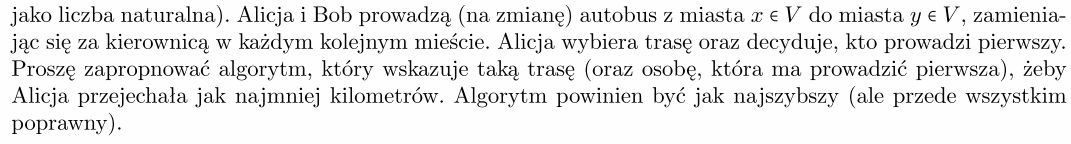

### Omówienie algorytmu

Dijkstra ze spamiętywaniem. Algorytm podobny do tych, jakie były przerabiane na BIT Algo. Musimy zmodyfikować Dijkstrę tak, aby w kolejce również zapamiętywana była informacja, kto prowadził ostatni. Dla każdego z wierzchołków tworzymy 2 sloty (ogólnie tablicę rozmiaru $ V \times 2 $ dla wszystkich wierzchołków). W pierwszym slocie będziemy zapamiętywać najkrótszą ścieżkę do danego wierzchołka (a dokładniej jedynie sumę wag krawędzi, które są fragmentami trasy, na których prowadziła Alicja, bo trasa przejechana przez Boba nas nie interesuje), jeżeli ostatnią osobą, która prowadziła, jest Alicja, a w drugim slocie zapiszemy długość odcinków przejechanych przez Alicję, jeżeli ostatnio prowadził Bob. Relaksacji będziemy dokonywać na odpowiednim slocie, w zależności od tego, kto prowadził ostatni. Wrzucając wartości do kolejki, będziemy aktualizować długość trasy, jedynie gdy na ostatnim odcinku prowadziła Alicja, bo tylko wtedy zmienie ulega interesująca nas część trasy. Oczywiście, jeżeli ostatnia prowadziła Alicja, to do kolejki wrzucamy wszystkie nieprzetworzone wierzchołki bieżącego wierzchołka wraz ze zaktualizowaną długością trasy (powiększoną o długość ostatniego odcinka), a jeżeli ostatni był Bob, to nie zwiększamy długości trasy. Naszym rozwiązaniem będzie mniejsza z dwóch wartości, jakie pojawią się dla wierzchołka docelowego (w poniższej implementacji, w której relaksację przeprowadzamy dopiero po zdjęciu wierzchołka z kolejki, a nie przed, rozwiązaniem będzie po prostu pierwsza wartość, jaka się pojawi dla wierzchołka docelowego, bo będzie to na pewno mniejsza wartość, ponieważ wcześniej ją zdjęliśmy z kolejki). Jeszcze interesuje nas, kto ma prowdzić pierwszy, a także cała trasa. Jest to dosyć proste, bo wystarczy trzymać tablicę rodziców każdego wierzchołka (dla każdego z dwóch slotów osobno) wraz z informacją o tym, kto prowadził ostatni. Na tej podstawie odtwarzamy całą ścieżkę, a przy ostatnim przejściu podczas odtwarzania ścieżki (tj. dla rodzica drugiego w kolejności na ścieżce wierzchołka) mamy zapisaną wartość, która nas informuje, kto prowadził na pierwszym odcinku drogi. Ta wartość posłuży nam do wskazania, kto zaczynał prowadzenie.

### Złożoność

###### Obliczeniowa:
$ O(2 \cdot E \cdot log(V)) = O(E \cdot log(V)) $
###### Pamięciowa:
$ O(2 \cdot V) = O(V) $ - zakładam, że na wejściu otrzymujemy mapę kraju w reprezentacji listowej

### Implementacja

In [1]:
from queue import PriorityQueue


def dijkstra(G: 'graph represented by adjacency lists', s: 'source', t: 'target'):
    n = len(G)
    inf = float('inf')
    weights = [[inf] * 2 for _ in range(n)]
    parents = [[None] * 2 for _ in range(n)]
    pq = PriorityQueue()
    # We will store in a pq queue tuples as follows:
    # (<Alice's distance>, <current vertex>, <parent vertex>, <flag indicating if
    # the last person who drives is Alice or Bob>)
    pq.put((0, s, None, 0))  # 0 - Alice starts
    pq.put((0, s, None, 1))  # 1 - Bob starts

    while not pq.empty():
        min_dist, u, parent, driver = pq.get()

        if min_dist < weights[u][driver]:
            weights[u][driver] = min_dist
            parents[u][driver] = (parent, int(not driver))
            # Break a loop if we found a shortest path to the specified
            # target
            if u == t: break
            # Add all the neighbours of the u vertex to the priority queue
            for v, weight in G[u]:
                # Add a path only if there hasn't been the shortest path yet
                # If the last was Alice and there is no shortest path to the v
                # vertex on which the last driver was Bob
                if driver == 0 and weights[v][1] == inf:
                    # Now Bob drives, so Alice's distance isn't updated
                    pq.put((min_dist, v, u, 1))
                # The last driver was Bob and there is no shortest path to
                # the v vertex on which Alice drives last
                elif weights[v][0] == inf:
                    # Now Alice drives, so distance is updated
                    pq.put((min_dist + weight, v, u, 0))
                    
    return parents, weights


def get_path(parents, t, last_driver):
    path = []
    
    prev_driver = last_driver
    while t is not None:
        path.append(t)
        t, prev_driver = parents[t][prev_driver]
        
    path.reverse()
    
    return path, prev_driver
        

def drive_bus(G: 'graph represented by adjacency lists', s: 'source', t: 'target'):
    # Let's say that we return ALice as there is noting to drive
    if s == t: return 'Alice', -1, []
    parents, weights = dijkstra(G, s, t)
    inf = float('inf')
    last_driver = 0 if weights[t][0] < inf else 1
    # Check if there is a path from s to t
    if weights[t][last_driver] == inf:
        return '', -1, [] 
    path, first_driver = get_path(parents, t, last_driver)
    return 'Alice' if not first_driver else 'Bob', weights[t][last_driver], path

###### Kilka testów

##### Pomocnicze

In [2]:
def directed_weighted_graph_list(E: 'array of edges'):
    # Find a number of vertices
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1
    # Create a graph
    G = [[] for _ in range(n)]
    for e in E:
        G[e[0]].append((e[1], e[2]))
    return G

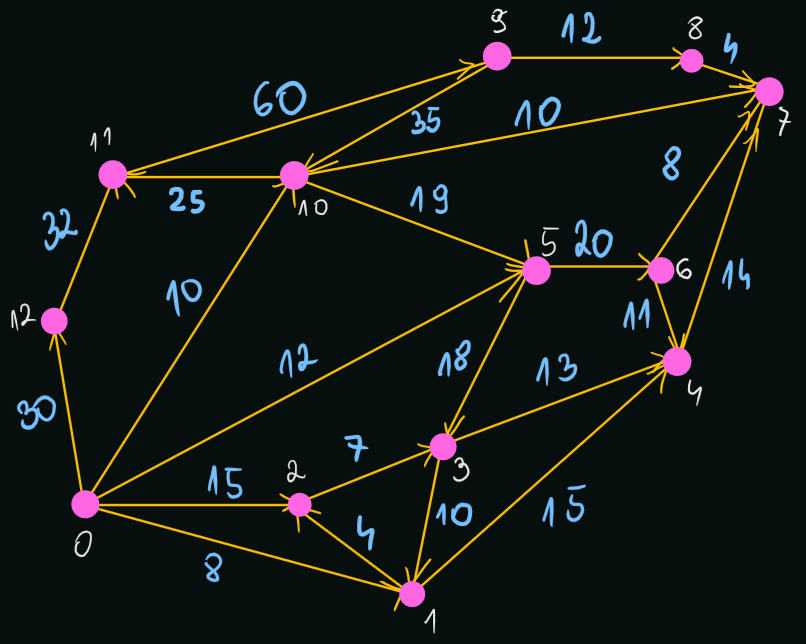

In [3]:
E = [(0, 1, 8), (0, 2, 15), (0, 5, 12), (0, 10, 10), (0, 12, 30), (1, 4, 15), (1, 2, 4), (2, 3, 7), (3, 1, 10), 
     (3, 4, 13), (4, 7, 14), (5, 6, 20), (5, 3, 18), (6, 4, 11), (6, 7, 8), (8, 7, 4), (9, 8, 12), (10, 5, 19),
     (10, 11, 25), (10, 7, 10), (11, 9, 60), (12, 11, 32), (9, 10, 25)]

G = directed_weighted_graph_list(E)

In [4]:
drive_bus(G, 0, 7)  # Alice or Bob is correct

('Bob', 10, [0, 10, 7])

In [5]:
drive_bus(G, 0, 5)  # Only Bob drives

('Bob', 0, [0, 5])

In [6]:
drive_bus(G, 0, 11)  # Alice starts

('Alice', 10, [0, 10, 11])

In [7]:
drive_bus(G, 0, 8)  # Bob starts (11 - 9 edge goes for Bob)

('Bob', 37, [0, 10, 11, 9, 8])

In [8]:
drive_bus(G, 1, 0)  # No path here

('', -1, [])

In [9]:
drive_bus(G, 9, 2)  # Bob starts

('Bob', 29, [9, 10, 5, 3, 1, 2])